In [2]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
tesla = quandl.get('WIKI/TSLA')
tesla = tesla[:'2018']

In [7]:
gm = quandl.get('WIKI/GM')
gm = gm[:'2018']

In [8]:
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}
gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}

In [9]:
tesla['Year'] = tesla.index.year

In [10]:
tesla.reset_index(level=0, inplace=True)
tesla['cap']=0

In [11]:
for i, year in enumerate(tesla['Year']):
    shares = tesla_shares.get(year)
    tesla.loc[i, 'cap'] = shares * tesla.loc[i, 'Adj. Close']

In [12]:
gm['Year'] = gm.index.year
gm.reset_index(level=0, inplace=True)
gm['cap']=0

In [13]:
for i, year in enumerate(gm['Year']):
    shares = gm_shares.get(year)
    gm.loc[i, 'cap'] = shares * gm.loc[i, 'Adj. Close']

In [14]:
cars = gm.merge(tesla, how='inner', on='Date')
cars.rename(columns={'cap_x':'gm_cap', 'cap_y':'tesla_cap'}, inplace=True)
cars = cars.loc[: , ['Date', 'gm_cap', 'tesla_cap']]
cars['gm_cap'] = cars['gm_cap'] / 1e9
cars['tesla_cap'] = cars['tesla_cap'] / 1e9


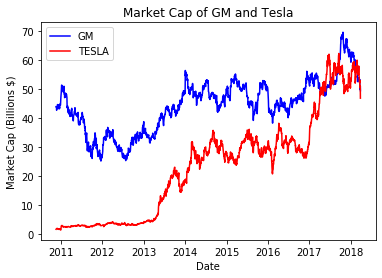

In [15]:
plt.figure()
plt.plot(cars['Date'], cars['gm_cap'], 'b-', label = 'GM')
plt.plot(cars['Date'], cars['tesla_cap'], 'r-', label = 'TESLA')
plt.xlabel('Date'); plt.ylabel('Market Cap (Billions $)'); plt.title('Market Cap of GM and Tesla')
plt.legend();

In [119]:
# Find the first and last time Tesla was valued higher than GM

In [17]:
# first_date = cars.iloc[ np.min(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0])) , 'Date' ]
# cars.loc[cars['tesla_cap'] > cars['gm_cap']]

In [165]:
# https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

In [108]:
gm2 = quandl.get('WIKI/GM')

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [109]:
gm2 = gm2["2017":"2018"]

In [111]:
a = gm2.index

pandas.core.frame.DataFrame

In [ ]:
a.weekday_name

In [ ]:
data = gm2.loc[:,'Adj. Close']
data = pd.DataFrame(data)

In [ ]:
data['shift_01'] = data.shift(periods=1)
data['shift_02'] = data['Adj. Close'].shift(periods=2)
data['pct_change_01'] = data['shift_01'].pct_change(periods=1)
data['pct_change_02'] = data['shift_01'].pct_change(periods=2)
data.plot()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
n_tree=100
rf = RandomForestRegressor(n_estimators=n_tree, max_depth=2, random_state=0)
data=data.dropna()

In [ ]:
X_train, y_train = data.loc[:'2017-03-01','shift_01':'pct_change_02'], data.loc[:'2017-03-01','Adj. Close']
X_test, y_test = data.loc['2017-03-02':'2017-03-10','shift_01':'pct_change_02'], data.loc['2017-03-02':'2017-03-10','Adj. Close']

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2017-03-02 00:00:00'), Timestamp('2017-03-03 00:00:00'),
       Timestamp('2017-03-06 00:00:00'), Timestamp('2017-03-07 00:00:00'),
       Timestamp('2017-03-08 00:00:00'), Timestamp('2017-03-09 00:00:00'),
       Timestamp('2017-03-10 00:00:00'), 'predicted'], dtype=object)

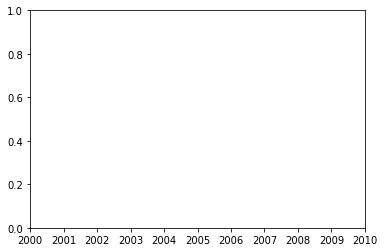

In [107]:
plt.plot(y_test)

In [63]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [65]:
print(dir(rf), '\n')

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'base_estimator', 'base_estimator_', 'bootstrap', 'class_weight', 'criterion', 'decision_path', 'estimator_params', 'estimators_', 'feature_importances_', 'fit', 'get_params', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 

In [104]:
rf.estimators_[0].predict

<bound method BaseDecisionTree.predict of DecisionTreeRegressor(criterion='mse', max_depth=2, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=209652396, splitter='best')>

In [80]:
per_tree_pred  = [ tree.predict(X_test) for tree in rf.estimators_ ]

In [101]:
per_tree_pred = np.array(per_tree_pred)

In [112]:
np.percentile(per_tree_pred, [5,25,50,75,95], axis=0)[:,0]

array([35.9633745 , 36.09289898, 36.27112065, 36.48057643, 36.65502038])

In [113]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html
#https://matplotlib.org/gallery/lines_bars_and_markers/fill_between_demo.html